In [1]:
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import sympy as sym
import matplotlib.pyplot as plt
import time
from copy import deepcopy

# 1.

## Question:

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Answer:

The number of multiplications is $(n \times k \times m)$ and the number of additions is $(n \times m \times (k-1))$.

## Explanation:

The matrix multiplication is defined as:

$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1k} \\
a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1m} \\
b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}
=
\begin{bmatrix}
c_{11} & c_{12} & \cdots & c_{1m} \\
c_{21} & c_{22} & \cdots & c_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
c_{n1} & c_{n2} & \cdots & c_{nm}
\end{bmatrix}
$$

To perform a matrix multiplication between a $(n, k)$ matrix $A$ and a $(k, m)$ matrix $B$, resulting in a $(n, m)$ matrix $C$, you need to compute each element of the resulting matrix $C$. The element at the $i^{th}$ row and $j^{th}$ column of $C$, denoted as $C_{ij}$, is obtained by multiplying and summing elements from the $i^{th}$ row of matrix $A$ and the $j^{th}$ column of matrix B. Specifically:

$$
\begin{align}
C_{ij} &= \sum_{l=1}^{k} A_{il} \cdot B_{lj} \\
&= A_{i1} \cdot B_{1j} + A_{i2} \cdot B_{2j} + \cdots + A_{ik} \cdot B_{kj}
\end{align}
$$

For each element of C, you need to perform $k$ multiplications and $(k-1)$ additions. Since there are $(n \times m)$ elements in C, the total number of multiplications is $(n \times k \times m)$ and the total number of additions is $(n \times m \times (k-1))$.

# 2.

## Question:

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

## Answer:

In [2]:
def matrix(n, k):
    return [[k*i+j for j in range(k)] for i in range(n)]

In [3]:
A = matrix(70, 75)
B = matrix(75, 65)

In [4]:
def matrix_mul(A, B):
    if len(A[0]) != len(B):
        return None
    return [[sum(A[i][k]*B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]

In [5]:
start = time.time()
for _ in range(100):
    matrix_mul(A, B)
end = time.time()

print(end - start)

start = time.time()
for _ in range(100):
    np.matmul(A, B)
end = time.time()

print(end - start)

1.5020458698272705
0.03778672218322754


Clearly, NumPy is faster. It's NumPy is implemented in C, which is well known for its speed. In addition, NumPy uses vectorization, which allows it to perform operations on multiple elements at once. This is much faster than performing operations on each element individually. For example, in the matrix multiplication, NumPy can compute each element of the resulting matrix $C$ by multiplying and summing the $i^{th}$ row of matrix $A$ and the $j^{th}$ column of matrix B in one operation. In contrast, the list of lists implementation needs to perform $k$ multiplications and $(k-1)$ additions for each element of $C$.

# 3.

## Question:

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

## Answer:

The time complexity of finding the median of the array using the method described above is $\text{O}(n^2)$.

A better method is to first sort the array using quicksort (or any other sorting algorithm with $\text{O}(n \log n)$ time complexity) and then find the median. The time complexity of this method is $\text{O}(n \log n)$.

In [6]:
def median(nums):
    length = len(nums)

    if length == 1:
        return nums[0]
    
    is_even = length % 2 == 0

    m = nums[0]
    idx = 0
    
    for _ in range(length//2 - 1):
        for i in range(len(nums)):
            if nums[i] >= m:
                m = nums[i]
                idx = i
            
        nums.pop(idx)
        m = nums[0]
        idx = 0

    for i in range(len(nums)):
        if nums[i] >= m:
            m = nums[i]
            idx = i
    
    nums.pop(idx)
    idx = 0
    
    m1 = nums[0]

    for i in range(len(nums)):
        if nums[i] >= m1:
            m1 = nums[i]
            idx = i

    if not is_even:
        return m1

    return (m + m1) / 2

In [7]:
def quick_median(nums):
    length = len(nums)

    if length == 1:
        return nums[0]
    
    is_even = length % 2 == 0
    
    nums.sort()

    if not is_even:
        return nums[length//2]
    
    return (nums[length//2] + nums[length//2 - 1]) / 2

In [8]:
a = [i for i in range(100)]
A = [np.random.permutation(a).tolist() for _ in range(100000)]

b = [i for i in range(101)]
B = [np.random.permutation(b).tolist() for _ in range(100000)]

results_a = [[], [], []]
results_b = [[], [], []]

start = time.time()
for i in range(100000):
    results_a[0].append(median(deepcopy(A[i])))
    results_b[0].append(median(deepcopy(B[i])))
end = time.time()

print(end - start)

start = time.time()
for i in range(100000):
    results_a[1].append(quick_median(deepcopy(A[i])))
    results_b[1].append(quick_median(deepcopy(B[i])))
end = time.time()

print(end - start)

start = time.time()
for i in range(100000):
    results_a[2].append(np.median(deepcopy(A[i])))
    results_b[2].append(np.median(deepcopy(B[i])))
end = time.time()

print(end - start)

# check if the results are the same
results_a = np.array(results_a, dtype=np.float32)
results_b = np.array(results_b, dtype=np.float32)

print(np.all(results_a[0] == results_a[1]), np.all(results_a[0] == results_a[2]), np.all(results_a[1] == results_a[2]))
print(np.all(results_b[0] == results_b[1]), np.all(results_b[0] == results_b[2]), np.all(results_b[1] == results_b[2]))

14.455348014831543
3.69461727142334
4.579908847808838
True True True
True True True


# 4.

## Question:

What is the gradient of the following function with respect to x and y?

$$ x^2y + y^3\sin(x) $$

## Answer:

$$
\begin{align*}
&\frac{\partial f}{\partial x} &= \frac{\partial}{\partial x} (x^2y + y^3\sin(x)) &= 2xy + y^3\cos(x) \\
&\frac{\partial f}{\partial y} &= \frac{\partial}{\partial y} (x^2y + y^3\sin(x)) &= x^2 + 3y^2\sin(x)
\end{align*}
$$

# 5.

## Question:

Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

## Answer:

In [9]:
def f(x, y):
    return (x**2)*y + (y**3)*jnp.sin(x)

def dfx(x, y):
    return 2*x*y + (y**3)*jnp.cos(x)

def dfy(x, y):
    return x**2 + 3*(y**2)*jnp.sin(x)

def gradient_jax(f, x, y):
    return jnp.array([jax.grad(f, 0)(x, y), jax.grad(f, 1)(x, y)])

In [10]:
[dfx(1., 2.).item(), dfy(1., 2.).item()], gradient_jax(f, 1., 2.).tolist()

I0000 00:00:1704281438.507288       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


([8.322418212890625, 11.097652435302734],
 [8.322418212890625, 11.097652435302734])

In [11]:
[dfx(-10., 10.).item(), dfy(-10., 10.).item()], gradient_jax(f, -10., 10.).tolist()

([-1039.071533203125, 263.20635986328125],
 [-1039.071533203125, 263.20635986328125])

In [12]:
[dfx(0., 0.).item(), dfy(0., 0.).item()], gradient_jax(f, 0., 0.).tolist()

([0.0, 0.0], [0.0, 0.0])

# 6.

## Question:

Use `sympy` to confirm that you obtain the same gradient analytically.

## Answer:

In [13]:
x, y = sym.symbols('x y')
f = (x**2)*y + (y**3)*sym.sin(x)

sym.diff(f, x), sym.diff(f, y)

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

# 7.

## Question:

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

## Answer:

In [14]:
main_dict =     {
                2022:   { 
                        "Branch 1":     {   
                                        1:      {
                                                "Roll Number": 1, 
                                                "Name": "N", 
                                                "Marks":        {  
                                                                "Maths": 100, 
                                                                "English": 70
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 2, 
                                                "Name": "M", 
                                                "Marks":        {
                                                                "Maths": 90, 
                                                                "English": 80
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 2, 
                                                "Name": "M", 
                                                "Marks":        {
                                                                "Maths": 90, 
                                                                "English": 80
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 1, 
                                                "Name": "N", 
                                                "Marks":        {
                                                                "Maths": 100, 
                                                                "English": 70
                                                                }
                                                }
                                        }
                        },
                2023:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 3, 
                                                "Name": "O", 
                                                "Marks":        {
                                                                "Maths": 80, 
                                                                "English": 90
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 4, 
                                                "Name": "P", 
                                                "Marks":        {
                                                                "Maths": 70, 
                                                                "English": 100
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 4, 
                                                "Name": "P", 
                                                "Marks":        {
                                                                "Maths": 70, 
                                                                "English": 100
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 3, 
                                                "Name": "O", 
                                                "Marks":        {
                                                                "Maths": 80, 
                                                                "English": 90
                                                                }
                                                }
                                        }
                        },
                2024:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 5, 
                                                "Name": "Q", 
                                                "Marks":        {
                                                                "Maths": 60, 
                                                                "English": 60
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 6, 
                                                "Name": "R", 
                                                "Marks":        {
                                                                "Maths": 50, 
                                                                "English": 50
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 6, 
                                                "Name": "R", 
                                                "Marks":        {
                                                                "Maths": 50, 
                                                                "English": 50
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 5, 
                                                "Name": "Q", 
                                                "Marks":        {
                                                                "Maths": 60, 
                                                                "English": 60
                                                                }
                                                }
                                        }
                        },
                2025:   {
                        "Branch 1":     {
                                        1:      {
                                                "Roll Number": 7, 
                                                "Name": "S", 
                                                "Marks":        {
                                                                "Maths": 40, 
                                                                "English": 40
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 8, 
                                                "Name": "T", 
                                                "Marks":        {
                                                                "Maths": 30, 
                                                                "English": 30
                                                                }
                                                }
                                        },
                        "Branch 2":     {
                                        1:      {
                                                "Roll Number": 8, 
                                                "Name": "T", 
                                                "Marks":        {
                                                                "Maths": 30, 
                                                                "English": 30
                                                                }
                                                },
                                        2:      {
                                                "Roll Number": 7, 
                                                "Name": "S", 
                                                "Marks":        {
                                                                "Maths": 40, 
                                                                "English": 40
                                                                }
                                                }
                                        }
                        }
                }

# 8.

## Question:

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [15]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def __repr__(self):
        return f"Year({self.year}): {[branch for branch in self.branches]}"

    def add_branch(self, branch):
        self.branches.append(branch)

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def __repr__(self):
        return f"\n\t{self.name}: {[student for student in self.students]}"

    def add_student(self, student):
        self.students.append(student)

class Student:
    def __init__(self, roll, name):
        self.roll = roll
        self.name = name
        self.marks = []

    def __repr__(self):
        return f"\n\t\tRoll-Number({self.roll}), Name({self.name}): {[marks for marks in self.marks]}"

    def add_marks(self, marks):
        self.marks.append(marks)

class Marks:
    def __init__(self, subject, marks):
        self.subject = subject
        self.marks = marks

    def __repr__(self):
        return f"\n\t\t\tSubject({self.subject}): Marks({self.marks})"

def create_year(year):
    year_obj = Year(year)

    for branch in main_dict[year]:
        branch_obj = Branch(branch)

        for student in main_dict[year][branch]:
            student_obj = Student(main_dict[year][branch][student]["Roll Number"], main_dict[year][branch][student]["Name"])

            for subject in main_dict[year][branch][student]["Marks"]:
                marks_obj = Marks(subject, main_dict[year][branch][student]["Marks"][subject])
                student_obj.add_marks(marks_obj)

            branch_obj.add_student(student_obj)

        year_obj.add_branch(branch_obj)

    return year_obj

year_2022 = create_year(2022)
year_2023 = create_year(2023)
year_2024 = create_year(2024)
year_2025 = create_year(2025)

year_2022, year_2023, year_2024, year_2025

(Year(2022): [
 	Branch 1: [
 		Roll-Number(1), Name(N): [
 			Subject(Maths): Marks(100), 
 			Subject(English): Marks(70)], 
 		Roll-Number(2), Name(M): [
 			Subject(Maths): Marks(90), 
 			Subject(English): Marks(80)]], 
 	Branch 2: [
 		Roll-Number(2), Name(M): [
 			Subject(Maths): Marks(90), 
 			Subject(English): Marks(80)], 
 		Roll-Number(1), Name(N): [
 			Subject(Maths): Marks(100), 
 			Subject(English): Marks(70)]]],
 Year(2023): [
 	Branch 1: [
 		Roll-Number(3), Name(O): [
 			Subject(Maths): Marks(80), 
 			Subject(English): Marks(90)], 
 		Roll-Number(4), Name(P): [
 			Subject(Maths): Marks(70), 
 			Subject(English): Marks(100)]], 
 	Branch 2: [
 		Roll-Number(4), Name(P): [
 			Subject(Maths): Marks(70), 
 			Subject(English): Marks(100)], 
 		Roll-Number(3), Name(O): [
 			Subject(Maths): Marks(80), 
 			Subject(English): Marks(90)]]],
 Year(2024): [
 	Branch 1: [
 		Roll-Number(5), Name(Q): [
 			Subject(Maths): Marks(60), 
 			Subject(English): Marks(60)], 
 		R

# 9.

## Question:

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

## Answer:

In [16]:
def y1(x):
    return x

def y2(x):
    return x**2

def y3(x):
    return (x**3)/100

def y4(x):
    return np.sin(x)

def y5(x):
    return (np.sin(x))/x

def y6(x):
    return np.log(x)

def y7(x):
    return np.exp(x)

y_funcs = {1: (y1, "x"), 2: (y2, "x^2"), 3: (y3, "(x^3)/100"), 4: (y4, "sin(x)"), 5: (y5, "sin(x)/x"), 6: (y6, "log(x)"), 7: (y7, "e^x")}

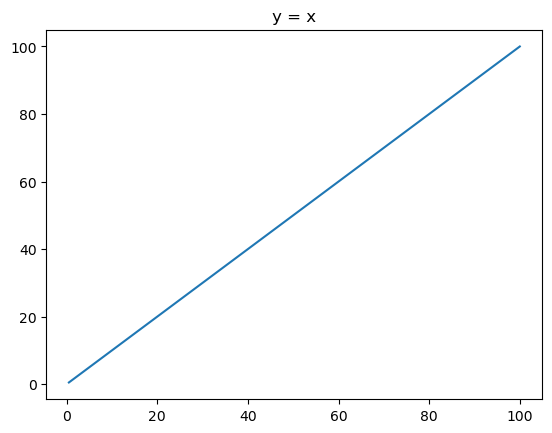

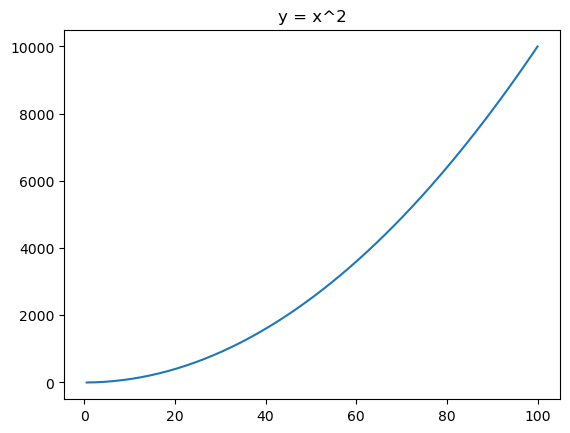

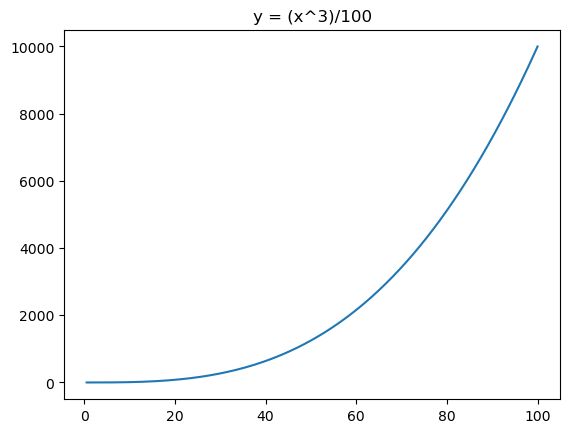

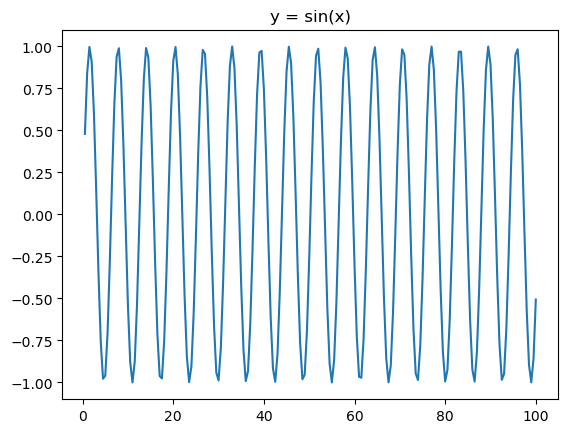

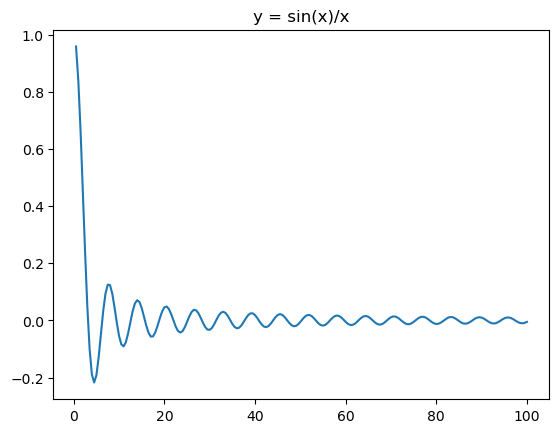

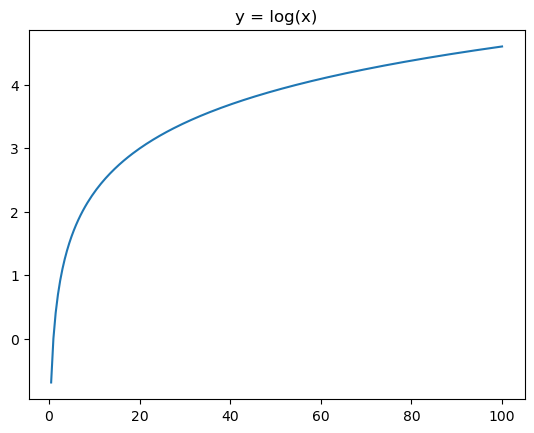

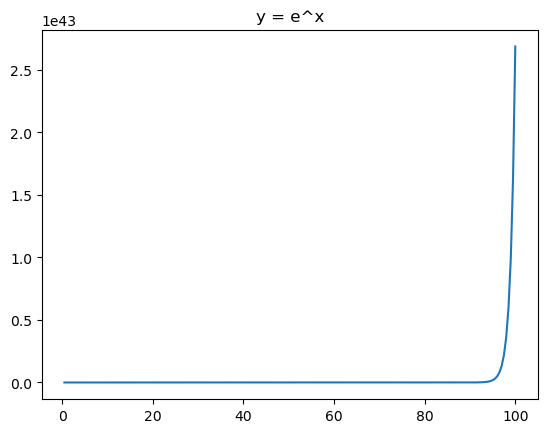

In [17]:
x = np.linspace(0.5, 100, 200)

for i in range(1, 8):
    plt.plot(x, y_funcs[i][0](x))
    plt.title(f"y = {y_funcs[i][1]}")
    plt.show()

# 10.

## Question:

Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

## Answer:

In [18]:
mat = np.random.rand(20, 5) + 1

mat

array([[1.42173042, 1.82986172, 1.77523888, 1.1158004 , 1.26042568],
       [1.62177381, 1.40456029, 1.46677565, 1.3965048 , 1.6895233 ],
       [1.30118003, 1.79771884, 1.19403731, 1.96082481, 1.64923571],
       [1.95526851, 1.17275404, 1.50601599, 1.43382864, 1.86488825],
       [1.1162382 , 1.71144781, 1.77357567, 1.31551181, 1.28540397],
       [1.11902921, 1.69826207, 1.73704231, 1.69449582, 1.91907291],
       [1.388885  , 1.36751199, 1.05536874, 1.50878082, 1.28788112],
       [1.18293509, 1.59342108, 1.26817858, 1.4900838 , 1.3344532 ],
       [1.28478916, 1.97740128, 1.6160724 , 1.9958247 , 1.24179401],
       [1.20115132, 1.53444383, 1.97069708, 1.35784461, 1.46172548],
       [1.51060419, 1.21853   , 1.67614873, 1.16103345, 1.47549453],
       [1.82408067, 1.38128993, 1.09330103, 1.99582936, 1.84873598],
       [1.329251  , 1.29360752, 1.44181112, 1.43586746, 1.96290566],
       [1.32691403, 1.92519773, 1.65721171, 1.47877507, 1.573991  ],
       [1.70032773, 1.069284  , 1.

In [19]:
df = pd.DataFrame(mat, columns=["a", "b", "c", "d", "e"])

df

,a,b,c,d,e
0,1.421730,1.829862,1.775239,1.115800,1.260426
1,1.621774,1.404560,1.466776,1.396505,1.689523
2,1.301180,1.797719,1.194037,1.960825,1.649236
3,1.955269,1.172754,1.506016,1.433829,1.864888
4,1.116238,1.711448,1.773576,1.315512,1.285404
5,1.119029,1.698262,1.737042,1.694496,1.919073
6,1.388885,1.367512,1.055369,1.508781,1.287881
7,1.182935,1.593421,1.268179,1.490084,1.334453
8,1.284789,1.977401,1.616072,1.995825,1.241794
9,1.201151,1.534444,1.970697,1.357845,1.461725


In [20]:
col_max_var = df.var().idxmax()

row_min_mean = df.mean(axis=1).idxmin()

col_max_var, row_min_mean

('d', 16)

# 11.

## Question:

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

## Answer:

In [21]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

df

,a,b,c,d,e,f
0,1.421730,1.829862,1.775239,1.115800,1.260426,7.403057
1,1.621774,1.404560,1.466776,1.396505,1.689523,7.579138
2,1.301180,1.797719,1.194037,1.960825,1.649236,7.902997
3,1.955269,1.172754,1.506016,1.433829,1.864888,7.932755
4,1.116238,1.711448,1.773576,1.315512,1.285404,7.202177
5,1.119029,1.698262,1.737042,1.694496,1.919073,8.167902
6,1.388885,1.367512,1.055369,1.508781,1.287881,6.608428
7,1.182935,1.593421,1.268179,1.490084,1.334453,6.869072
8,1.284789,1.977401,1.616072,1.995825,1.241794,8.115882
9,1.201151,1.534444,1.970697,1.357845,1.461725,7.525862


In [22]:
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")

df

,a,b,c,d,e,f,g
0,1.421730,1.829862,1.775239,1.115800,1.260426,7.403057,LT8
1,1.621774,1.404560,1.466776,1.396505,1.689523,7.579138,LT8
2,1.301180,1.797719,1.194037,1.960825,1.649236,7.902997,LT8
3,1.955269,1.172754,1.506016,1.433829,1.864888,7.932755,LT8
4,1.116238,1.711448,1.773576,1.315512,1.285404,7.202177,LT8
5,1.119029,1.698262,1.737042,1.694496,1.919073,8.167902,GT8
6,1.388885,1.367512,1.055369,1.508781,1.287881,6.608428,LT8
7,1.182935,1.593421,1.268179,1.490084,1.334453,6.869072,LT8
8,1.284789,1.977401,1.616072,1.995825,1.241794,8.115882,GT8
9,1.201151,1.534444,1.970697,1.357845,1.461725,7.525862,LT8


In [23]:
df[df["g"] == "LT8"].shape[0], df[df["g"] == "GT8"].shape[0]

(17, 3)

In [24]:
df[df["g"] == "LT8"]["f"].std(), df[df["g"] == "GT8"]["f"].std()

(0.5505700717661685, 0.026021976346916418)

# 12.

## Question:

Write a small piece of code to explain broadcasting in numpy.

## Answer:

Broadcasting is a feature of NumPy that allows it to perform operations on arrays of different shapes. For example, if you add a scalar to an array, NumPy will add the scalar to each element of the array. Similarly, if you add a 1D array to a 2D array, NumPy will add the 1D array to each row of the 2D array.

In [25]:
a = np.array([1, 2, 3])
b = 2

a + b

array([3, 4, 5])

In [26]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([10, 20, 30])

a + b

array([[11, 22, 33],
       [14, 25, 36]])

# 13.

## Question:

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

## Answer:

In [27]:
def argmin(x):
    if len(x) == 1:
        return 0
    
    m = x[0]
    idx = 0

    for i in range(1, len(x)):
        if x[i] < m:
            m = x[i]
            idx = i

    return idx

In [28]:
argmin([1, 2, 3, 4, 5]), np.argmin([1, 2, 3, 4, 5])

(0, 0)

In [29]:
argmin([5, 4, 3, 2, 1]), np.argmin([5, 4, 3, 2, 1])

(4, 4)

In [30]:
argmin([1, 1, 1, 1, 1]), np.argmin([1, 1, 1, 1, 1])

(0, 0)

In [31]:
argmin([1, 2, 3, 2, 1]), np.argmin([1, 2, 3, 2, 1])

(0, 0)

In [32]:
argmin([4, 3, 1, 2, 3, 4]), np.argmin([4, 3, 1, 2, 3, 4])

(2, 2)